<a href="https://colab.research.google.com/github/comparativechrono/GMO7-Jupyter/blob/main/MRes/M3/Python_prompt_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:
Linear Regression - MSE: 28.13, MAE: 4.26, R²: 0.46
Linear Regression - Cross-Validation R² scores: [ 0.13196287  0.25215761  0.2898108  -0.02908193  0.00075164]
Linear Regression - Mean CV R²: 0.13, Std CV R²: 0.13


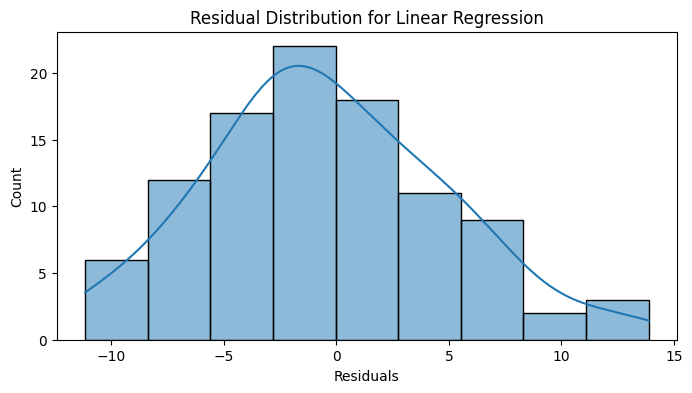

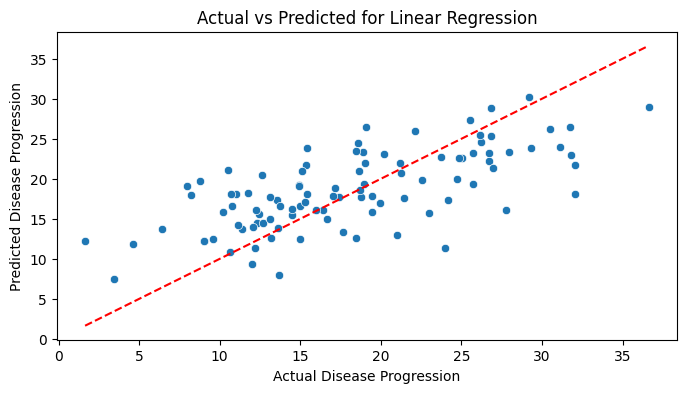

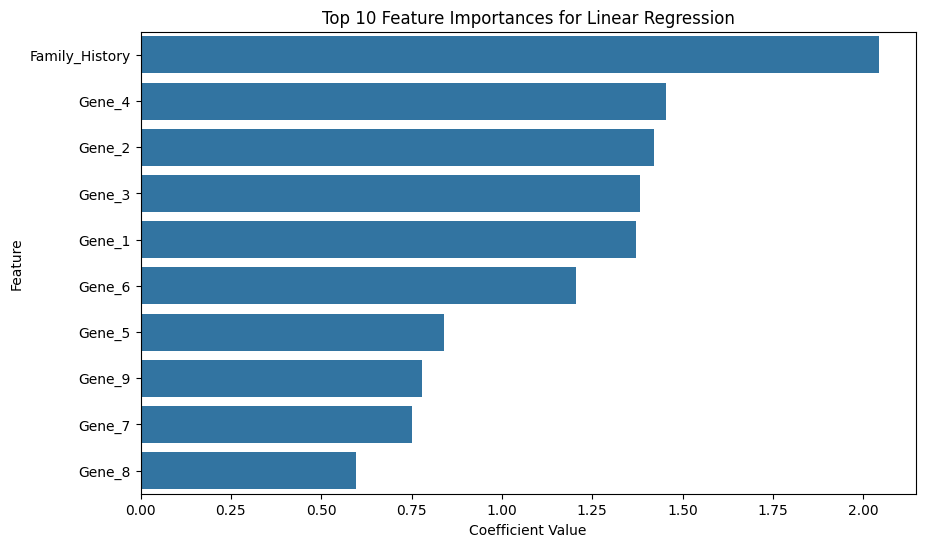


Ridge Regression:
Ridge Regression - MSE: 28.10, MAE: 4.26, R²: 0.46
Ridge Regression - Cross-Validation R² scores: [ 0.13463529  0.25404933  0.29217061 -0.02548669  0.01054918]
Ridge Regression - Mean CV R²: 0.13, Std CV R²: 0.13


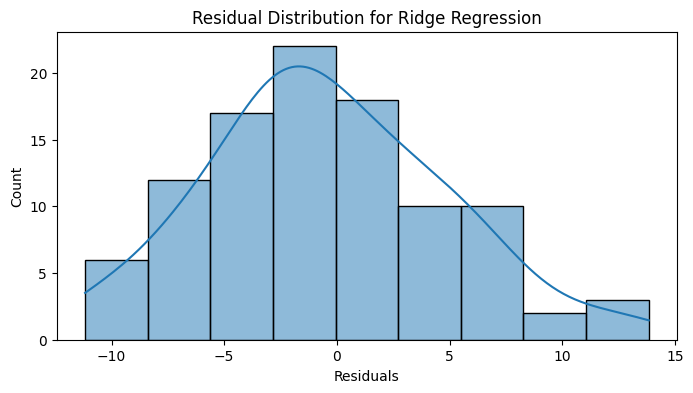

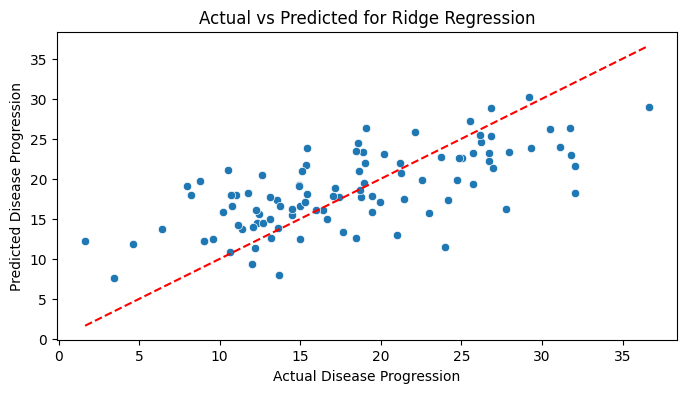

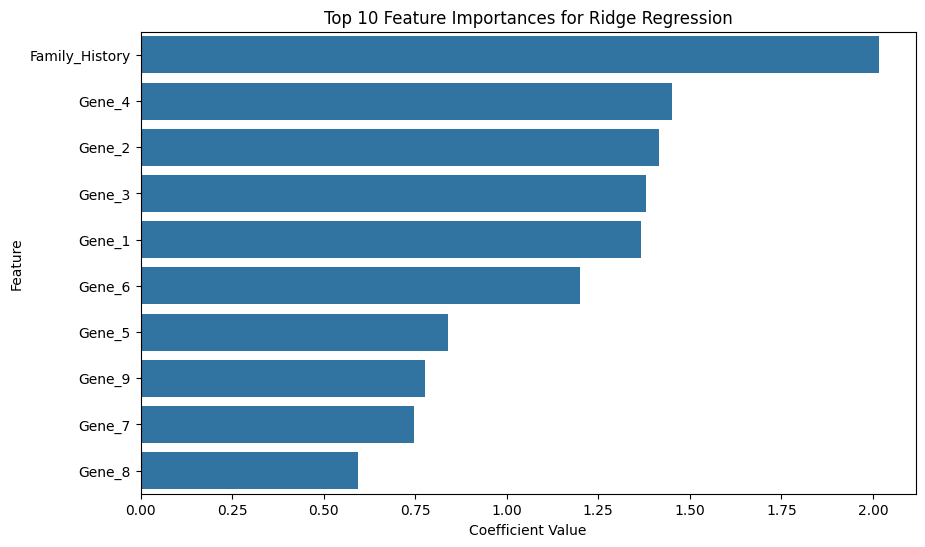


Lasso Regression:
Lasso Regression - MSE: 25.77, MAE: 4.11, R²: 0.51
Lasso Regression - Cross-Validation R² scores: [0.25346871 0.34665695 0.39764405 0.16506019 0.24138677]
Lasso Regression - Mean CV R²: 0.28, Std CV R²: 0.08


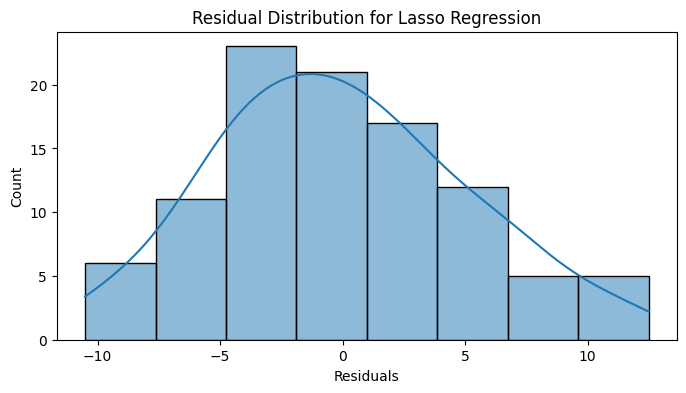

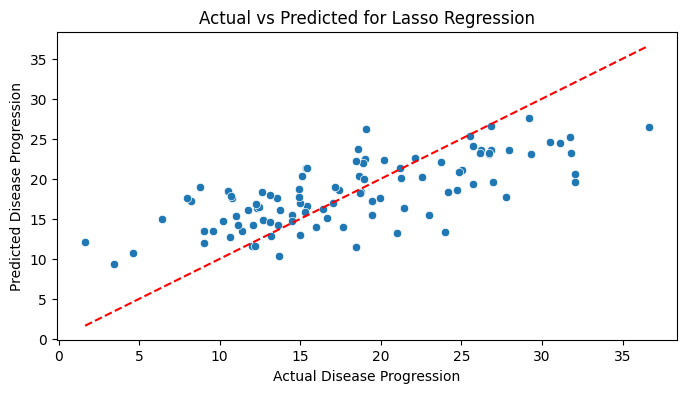

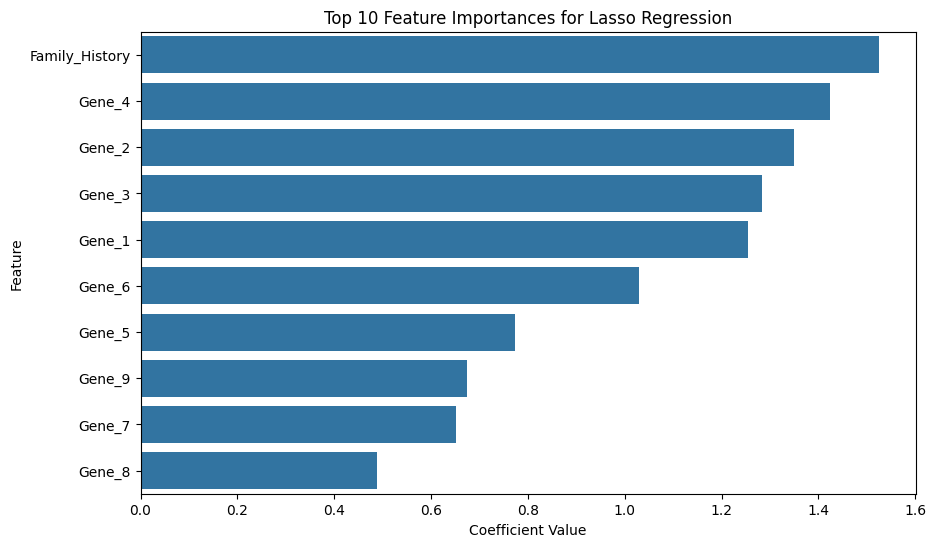


Polynomial Regression (degree 2):
Polynomial Regression (degree 2) - MSE: 38.25, MAE: 4.84, R²: 0.27
Polynomial Regression (degree 2) - Cross-Validation R² scores: [-0.07338546 -0.10237823  0.11438648 -0.47176028 -0.15031046]
Polynomial Regression (degree 2) - Mean CV R²: -0.14, Std CV R²: 0.19


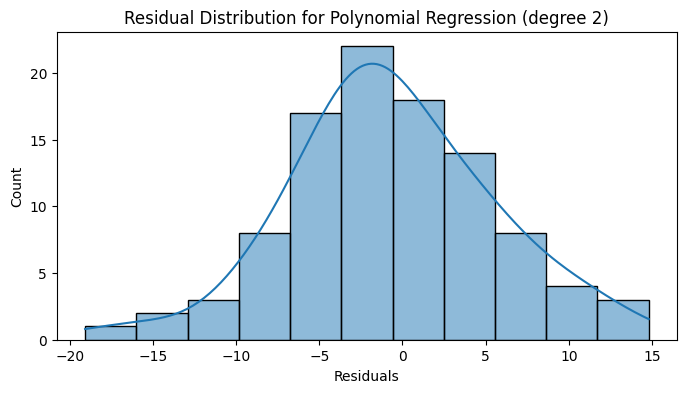

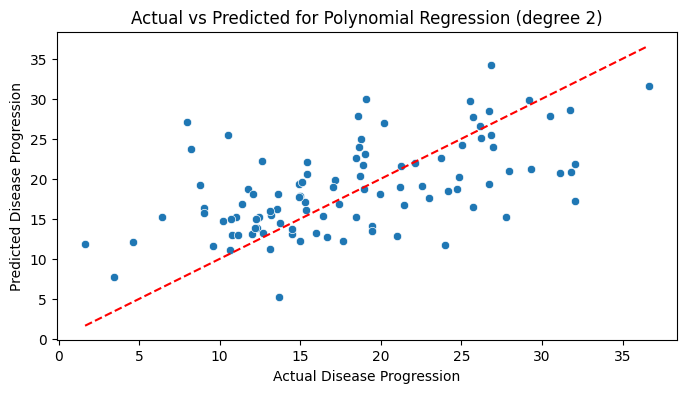


Elastic Net Regression:
Elastic Net Regression - MSE: 26.52, MAE: 4.17, R²: 0.49
Elastic Net Regression - Cross-Validation R² scores: [0.2293364  0.32761756 0.36794812 0.11273552 0.21613966]
Elastic Net Regression - Mean CV R²: 0.25, Std CV R²: 0.09


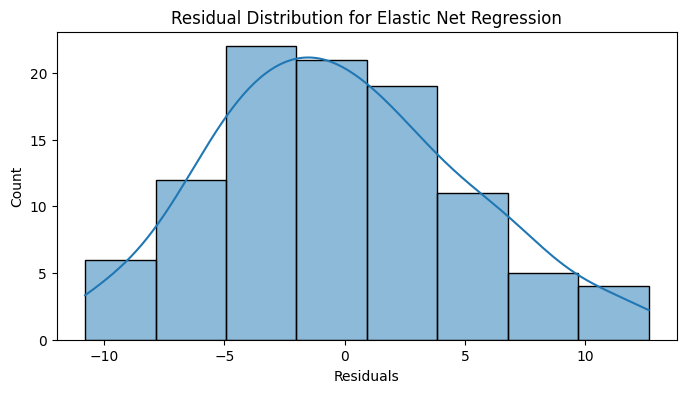

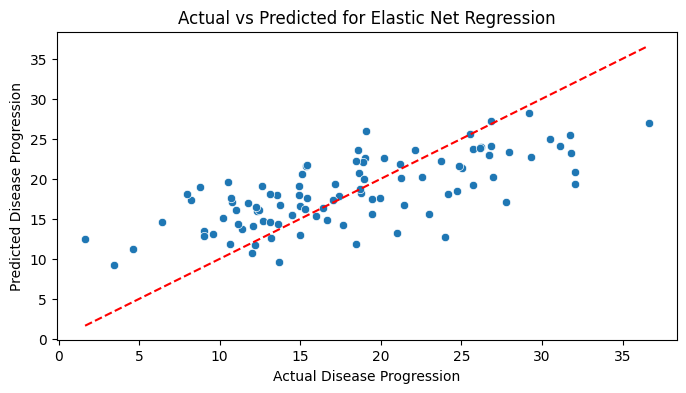

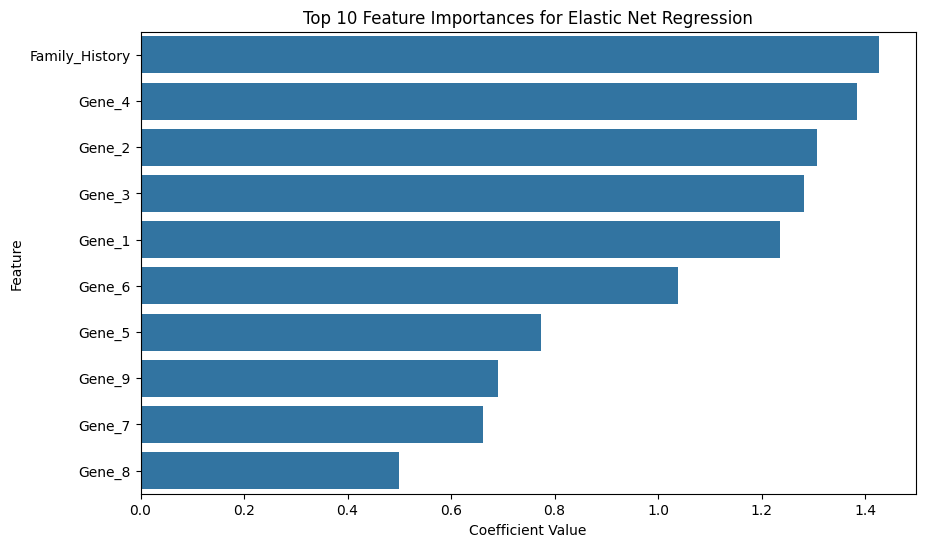

(26.518356093737808, 4.1723781484255875, 0.4934215669472959)

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/clinical_genomic_toy_data.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['Disease_Progression'])
y = data['Disease_Progression']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate standard metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

    # Cross-Validation Scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{model_name} - Cross-Validation R² scores: {cv_scores}")
    print(f"{model_name} - Mean CV R²: {cv_scores.mean():.2f}, Std CV R²: {cv_scores.std():.2f}")

    # Residual Analysis
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 4))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residual Distribution for {model_name}')
    plt.xlabel('Residuals')
    plt.show()

    # Scatter plot of actual vs predicted
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.xlabel('Actual Disease Progression')
    plt.ylabel('Predicted Disease Progression')
    plt.show()

    # Feature Importance for Linear Models
    if hasattr(model, 'coef_'):
        importance = model.coef_
        feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
        plt.title(f'Top 10 Feature Importances for {model_name}')
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.show()

    return mse, mae, r2

# Linear Regression
print("Linear Regression:")
lin_reg = LinearRegression()
evaluate_model(lin_reg, X_train, X_test, y_train, y_test, model_name="Linear Regression")

# Ridge Regression
print("\nRidge Regression:")
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, model_name="Ridge Regression")

# Lasso Regression
print("\nLasso Regression:")
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, model_name="Lasso Regression")

# Polynomial Regression (degree 2)
print("\nPolynomial Regression (degree 2):")
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
evaluate_model(poly_model, X_train, X_test, y_train, y_test, model_name="Polynomial Regression (degree 2)")

# Elastic Net Regression
print("\nElastic Net Regression:")
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
evaluate_model(elastic_net, X_train, X_test, y_train, y_test, model_name="Elastic Net Regression")
